# 🛰️ Tutorial: Conservation of Momentum and Spacecraft Gyros

In this notebook, you'll learn how spacecraft use conservation of angular momentum and onboard gyros (reaction wheels or CMGs) to precisely control orientation without firing thrusters.

## 🌌 Background Concepts

**Angular momentum** is conserved in an isolated system. For a spacecraft:

\[ L = I \omega \]

Where:
- \( L \): angular momentum
- \( I \): moment of inertia
- \( \omega \): angular velocity

**Gyros** (reaction wheels) spin up or down, and by Newton's Third Law, the spacecraft rotates in the opposite direction to conserve momentum.


## 🧪 Simulation: How a Reaction Wheel Changes Spacecraft Orientation

We simulate a 1D spacecraft with a single reaction wheel. When the wheel spins, the spacecraft rotates in the opposite direction.

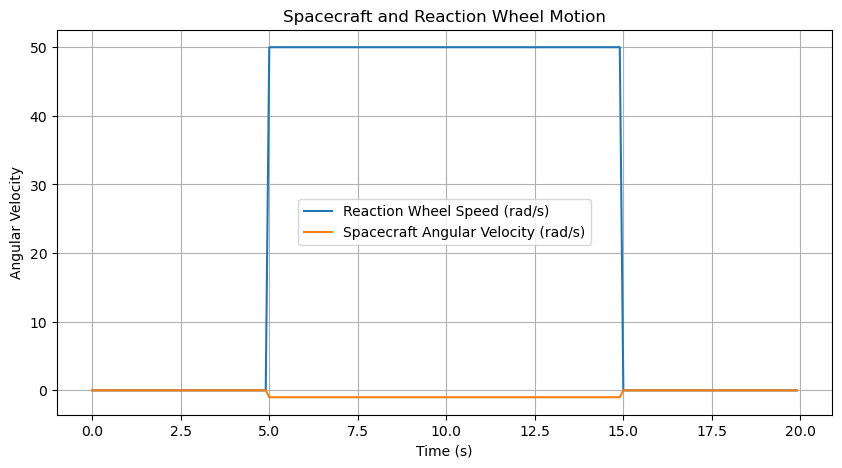

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
I_sc = 50     # Spacecraft moment of inertia (kg m^2)
I_rw = 1      # Reaction wheel moment of inertia (kg m^2)

dt = 0.1      # Time step (s)
t = np.arange(0, 20, dt)

# Define wheel angular velocity profile
rw_speed = np.piecewise(t, [t < 5, (t >= 5) & (t < 15), t >= 15], [0, 50, 0])
# Reaction wheel accelerates then decelerates
rw_accel = np.gradient(rw_speed, dt)

# Conservation of momentum: I_sc * w_sc + I_rw * w_rw = const
# Assume system starts from rest, so total L = 0
# So spacecraft angular velocity is:
sc_speed = -(I_rw / I_sc) * rw_speed

# Plot
plt.figure(figsize=(10,5))
plt.plot(t, rw_speed, label='Reaction Wheel Speed (rad/s)')
plt.plot(t, sc_speed, label='Spacecraft Angular Velocity (rad/s)')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity')
plt.title('Spacecraft and Reaction Wheel Motion')
plt.legend()
plt.grid(True)
plt.show()

## 🤔 Reflection

- Notice how the spacecraft rotates in the **opposite direction** to the wheel.
- When the wheel speed levels off, the spacecraft **stops accelerating**.
- Reversing the wheel brings the spacecraft back.

This is how precise **attitude control** is achieved: by carefully controlling the speed of spinning gyros.